# The goal is to test the various methods of splitting Training sets and Test sets.  
## Using Decision Trees


## Jupyter Notebook and Python Version
### The version of the notebook server is: 6.4.12


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statistics 

from sklearn.metrics import accuracy_score 
from sklearn import preprocessing as scale
from sklearn.metrics import classification_report
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
 
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit, 
                                     train_test_split, GroupShuffleSplit, 
                                     GroupKFold)
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit, 
                                     train_test_split, GroupShuffleSplit, 
                                     GroupKFold)

 
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore') 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedGroupKFold

In [2]:
churndata = pd.read_csv('TestingTheSplit.csv')

In [3]:
#churndata.to_csv('TestingTheSplitOutput.csv')

In [4]:
churndata.shape

(10000, 52)

## Look for duplicates

In [5]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

## No duplicates found

In [6]:
churndata.duplicated().value_counts()

False    10000
dtype: int64

### There are absolutely NO duplicates


## Detection of Missing Data

In [7]:
churndata.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [8]:
churndata.Contacts.unique()

array([0, 2, 3, 1, 4, 5, 6, 7], dtype=int64)

### Overall interpretations of the graphs and treatment preference


I want to look at the distribution shapes of the seven columns with NULL data and the type of distributuon that each of those graphs has. I will be treating the missing data according to the primary method listed in the lecture based on the inital distribution of the data that contains the missing data.  I will include all of the code and proof that each of the columns with null values were imputed using the prefered treatment method in the sections below.


* The Children graph is positively skewed to the right.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.
* The Age graph has a uniform distribution meaning it is equally spread with no peaks. The Mean will be imputed for the missing  values since it is the prefered method of imputation for graphs with a uniform distribution.
* The Income graph is positively skewed to the right.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.
* The TechSupport graph shows that it is a yes no option and there are NULL values in addition. The prefered imputation method for cateforical data is to use the Mode value when imputing data for the NULL values.
* The Techie graph shows that it is a yes no option and there are NULL values in addition. The prefered imputation method for cateforical data is to use the Mode value when imputing data for the NULL values.
* The Phone graph shows that it is a yes no option and there are NULL values in addition.  The prefered imputation method for cateforical data is to use the Mode value when imputing data for the NULL values.
* The Tenure graph has a bimodal distribution and is non-symetric. The prefered imputation method for the skewed graph is to impute the median value for the NULL values.
* The Bandwidth_GB_Year has a bimodal distribution and is non-symetric.  This graph is a bit more symetric than the Tenure graph.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.





## Treating missing data


I will be treating the missing data according to the primary method listed in the lecture based on the inital distribution of the data that contains the missing data.  

### Children imputation
The Children graph is positively skewed to the right.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.


In [9]:
churndata["Children"].fillna(churndata["Children"].median(), inplace = True)

The median number of Children is 1.  After running the histogram, you can see that there is a spike at 1 that shows that all of the NULL values were replaced with 1.0.

In [10]:
print(churndata["Children"].median())

1.0


<Axes: >

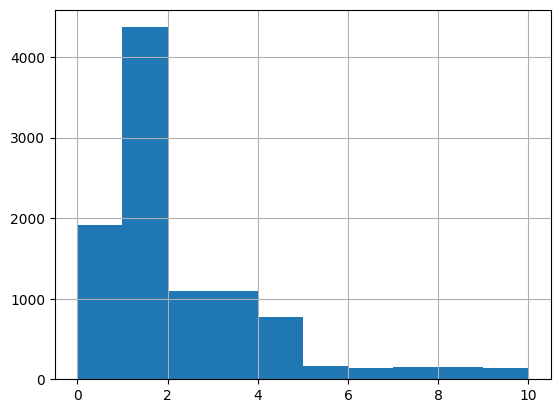

In [11]:
churndata['Children'].hist()

There are no fields in the Children column with NULL values.

In [12]:
churndata['Children'].isnull().sum()

0

### Age imputation

The Age graph has a uniform distribution meaning it is equally spread with no peaks. The Mean will be imputed for the missing  values since it is the prefered method of imputation for graphs with a uniform distribution.   

Since the mean of the Age column is 53.27574750830565, that value will be imputed  for all of the places there are NULL value in that column. To do this, I will use the Fillna function.

In [13]:
churndata["Age"].fillna(churndata["Age"].mean(), inplace = True)

After the Age NULL values were filled with the mean values, there is a difference in the graph with a spike at the Mean value.

<Axes: >

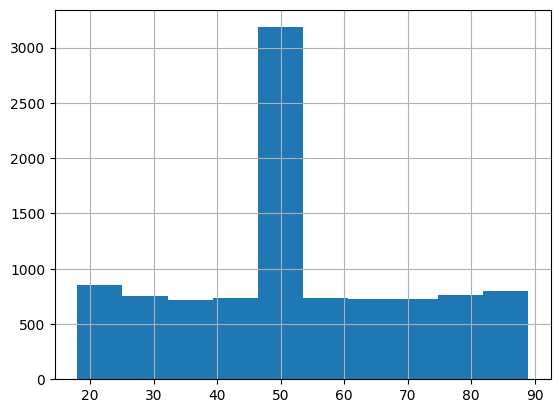

In [14]:
churndata['Age'].hist()

There are no NULL values in the Age column.

In [15]:
churndata['Age'].isnull().sum()

0

The Mean is still 53.275747508309024.

In [16]:
 churndata['Age'].mean()

53.27574750830565

### Income imputation

The Income graph is positively skewed to the right.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.

In [17]:
print(churndata["Income"].median())

33186.785


In [18]:
churndata["Income"].fillna(churndata["Income"].median(), inplace = True)

After the imputation, the graph is still positively skewed, but you can see a spike aroud the median value below 50,000 dollars. After imputation, the median is still $33,186.785 

<Axes: >

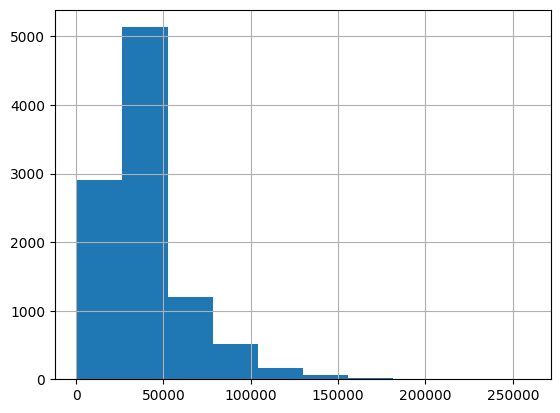

In [19]:
churndata['Income'].hist()

In [20]:
print(churndata["Income"].median())

33186.785


There are no NULL values in the Income column.

In [21]:
churndata['Children'].isnull().sum()

0

### Tenure imputation

The Tenure graph has a bimodal distribution and is non-symetric. The prefered imputation method for the skewed graph is to impute the median value for the NULL values.


In [22]:
print(churndata["Tenure"].median())

36.19603


In [23]:
churndata["Tenure"].fillna(churndata["Tenure"].median(), inplace = True)

After the imputation, the graph still has a bimodal distribuation that is non-symetric, but now there is a spike at the median value.  You can also see that there are now 0 NULL values in the Tenure column.

<Axes: >

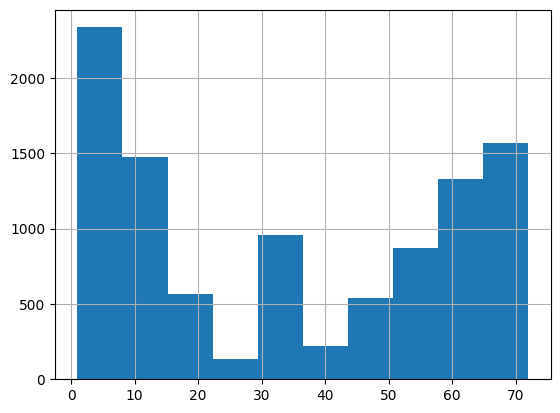

In [24]:
churndata['Tenure'].hist()

In [25]:
churndata['Tenure'].isnull().sum()

0

### Bandwidth_GB_Year imputation

The Bandwidth_GB_Year has a bimodal distribution and is non-symetric.  This graph is a bit more symetric than the Tenure graph.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.


In [26]:
print(churndata["Bandwidth_GB_Year"].median())

3382.424


In [27]:
churndata["Bandwidth_GB_Year"].fillna(churndata["Bandwidth_GB_Year"].median(), inplace = True)

<Axes: >

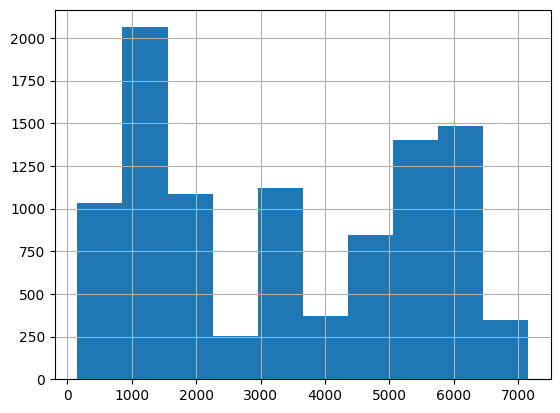

In [28]:
churndata['Bandwidth_GB_Year'].hist()

After the imputation, the graph still has a bimodal distribuation that is non-symetric, but now there is a spike at the median value.  You can also see that there are now 0 NULL values in the Tenure column.

In [29]:
churndata['Bandwidth_GB_Year'].isnull().sum()

0

## TechSupport imputation

In [30]:
print(churndata['TechSupport'].mode())

0    No
Name: TechSupport, dtype: object


In [31]:
churndata['TechSupport'] = churndata['TechSupport'].fillna(churndata['TechSupport'].mode()[0])

The TechSupport graph shows that it is a yes/no option and there are no NULL values in after the imputation. The prefered imputation method for categorical data is to use the Mode value when imputing data for the NULL values. 



<Axes: >

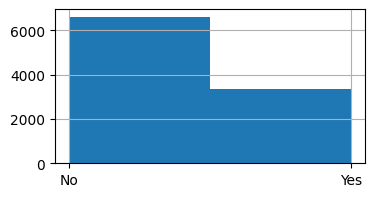

In [32]:
churndata['TechSupport'].hist(bins = 2, figsize=(4,2))

In [33]:
churndata['TechSupport'].isnull().sum()

0

### Techie imputation

The Techie graph shows that it is a yes/no option and there are NULL values in addition. The prefered imputation method for cateforical data is to use the Mode value when imputing data for the NULL values.



In [34]:
print(churndata['Techie'].mode())

0    No
Name: Techie, dtype: object


In [35]:

churndata['Techie'] = churndata['Techie'].fillna(churndata['Techie'].mode()[0])

After the imputation, the graph still has changed a bit and there are more values at the mode value of 0. You can also see that there are now 0 NULL values in the Techie column.

<Axes: >

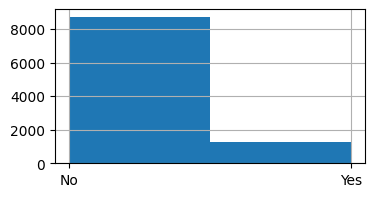

In [36]:
churndata['Techie'].hist(bins = 2, figsize=(4,2))

In [37]:
churndata['Techie'].isnull().sum()

0

### Phone imputation

The Phone graph shows that it is a yes no option and there are NULL values in addition.  The prefered imputation method for categorical data is to use the Mode value when imputing data for the NULL values.


In [38]:
print(churndata['Phone'].mode())

0    Yes
Name: Phone, dtype: object


In [39]:
churndata['Phone'] = churndata['Phone'].fillna(churndata['Phone'].mode()[0])

After the imputation, the graph still has changed a bit and there are more values at the mode value of 0. You can also see that there are now 0 NULL values in the Phone column.

<Axes: >

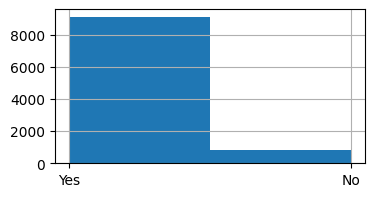

In [40]:
churndata['Phone'].hist(bins = 2, figsize=(4,2))

In [41]:
churndata['Phone'].isnull().sum()

0

### All NULL values from each column have been imputed.

In [42]:
churndata.isnull().sum()

Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

### Update the CSV file with imputed data.

In [43]:
churndata.to_csv('D209_Task2_TreatedData.csv')

# Data Wrangling

 ## Code to change the column names of items1 through items8

In [44]:
churndata.rename(columns={'item1':'TimelyResponse'}, inplace=True)

In [45]:
churndata.rename(columns={'item2':'TimelyFixes'}, inplace=True)

In [46]:
churndata.rename(columns={'item3':'TimelyReplacements'}, inplace=True)

In [47]:
churndata.rename(columns={'item4':'Reliability'}, inplace=True)

In [48]:
churndata.rename(columns={'item5':'Options'}, inplace=True)

In [49]:
churndata.rename(columns={'item6':'TimelyFixes'}, inplace=True)

In [50]:
churndata.rename(columns={'item7':'CourteousExchange'}, inplace=True)

In [51]:
churndata.rename(columns={'item8':'ActiveListening'}, inplace=True)

The column names were changed.

In [52]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                 

### Update the CSV file to include column name changes

In [53]:
churndata.to_csv('CleanedData.csv')

You can see that the index for the table is now Customer_id.

In [54]:
display(churndata.isnull().any())

Unnamed: 0              False
CaseOrder               False
Customer_id             False
Interaction             False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
Timezone                False
Job                     False
Children                False
Age                     False
Education               False
Employment              False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecu

In [55]:
display(churndata.isnull().any())

Unnamed: 0              False
CaseOrder               False
Customer_id             False
Interaction             False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
Timezone                False
Job                     False
Children                False
Age                     False
Education               False
Employment              False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecu

In [56]:
### Update the CSV file to include column name changes

churndata.to_csv('CleanedData.csv')

### prints out a correlation matrix

In [57]:
display(churndata.corr())

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,TimelyFixes,CourteousExchange,ActiveListening
Unnamed: 0,1.000000,1.000000,3.007020e-03,-0.014680,-0.001363,-0.007494,-0.013537,0.006900,-0.003319,0.013356,...,0.005905,0.783217,-0.004318,0.005959,0.003245,-5.640975e-03,0.016429,-0.007837,0.003595,-0.014840
CaseOrder,1.000000,1.000000,3.007020e-03,-0.014680,-0.001363,-0.007494,-0.013537,0.006900,-0.003319,0.013356,...,0.005905,0.783217,-0.004318,0.005959,0.003245,-5.640975e-03,0.016429,-0.007837,0.003595,-0.014840
Zip,0.003007,0.003007,1.000000e+00,-0.042580,-0.901786,0.045138,-0.020663,-0.000607,0.001234,0.002708,...,-0.007403,-0.002239,-0.026024,-0.003215,-0.019687,6.196497e-07,0.002923,0.007375,-0.005537,-0.002577
Lat,-0.014680,-0.014680,-4.257985e-02,1.000000,-0.100639,-0.220598,0.003504,-0.003891,0.012640,0.016131,...,0.003673,-0.014513,0.005793,0.005380,-0.003421,1.101487e-02,-0.000464,-0.008726,0.006087,-0.019583
Lng,-0.001363,-0.001363,-9.017856e-01,-0.100639,1.000000,-0.048294,0.022543,0.002636,-0.001098,-0.005380,...,0.010396,0.003526,0.024389,0.003024,0.014966,-2.397806e-03,0.001366,-0.008770,0.001601,0.001912
Population,-0.007494,-0.007494,4.513808e-02,-0.220598,-0.048294,1.000000,-0.011772,-0.001702,-0.002558,-0.005205,...,-0.005957,0.000524,0.000618,-0.002571,0.001620,-8.272481e-03,0.006970,0.000834,-0.013062,0.008524
Children,-0.013537,-0.013537,-2.066301e-02,0.003504,0.022543,-0.011772,1.000000,-0.019069,0.012895,0.003086,...,-0.003096,0.010368,0.007764,0.001835,-0.005434,-1.346182e-02,-0.005984,0.000638,0.005824,-0.009203
Age,0.006900,0.006900,-6.065251e-04,-0.003891,0.002636,-0.001702,-0.019069,1.000000,0.000229,-0.015632,...,0.006979,-0.021517,-0.006818,0.009103,-0.004646,9.692076e-03,-0.004166,0.007541,0.001765,0.015568
Income,-0.003319,-0.003319,1.234453e-03,0.012640,-0.001098,-0.002558,0.012895,0.000229,1.000000,0.005895,...,-0.005718,0.003149,0.000908,0.007255,-0.005397,-1.968886e-02,0.008275,-0.002356,0.011027,-0.004754
Outage_sec_perweek,0.013356,0.013356,2.707573e-03,0.016131,-0.005380,-0.005205,0.003086,-0.015632,0.005895,1.000000,...,0.130688,0.014295,-0.013902,-0.017688,-0.029858,9.710577e-03,-0.007652,-0.000540,-0.013665,0.010331


In [58]:
## Correlation Matrix

<Axes: >

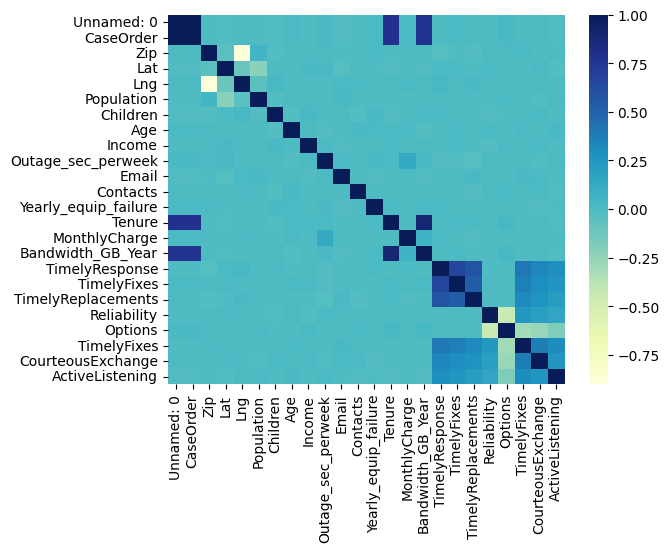

In [59]:
sns.heatmap(churndata.corr(),xticklabels =churndata.corr().columns, cmap='YlGnBu' )

# Create DTdata data frame

In [60]:
DTdata = churndata[['Contacts','Churn', 'Techie', 'Phone'  , 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling' ]]  

In [61]:
DTdata

,Contacts,Churn,Techie,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0,No,No,Yes,No,Yes,Yes,No,No,No,Yes,Yes
1,0,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes
2,0,No,Yes,Yes,Yes,No,No,No,No,No,Yes,Yes
3,2,No,Yes,Yes,No,Yes,No,No,No,Yes,No,Yes
4,2,Yes,No,No,No,No,No,No,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,No,No,Yes,Yes,No,Yes,Yes,No,No,No,No
9996,2,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No
9997,0,No,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes
9998,1,No,No,No,Yes,No,No,No,Yes,Yes,Yes,Yes


In [62]:
DTdata.isnull().sum()

Contacts            0
Churn               0
Techie              0
Phone               0
Multiple            0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
dtype: int64

## Mean, median and mode for the predictor and target variable

In [63]:
DTdata.describe()
 

,Contacts
count,10000.000000
mean,0.994200
std,0.988466
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,7.000000


# Data Wrangling

### Contacts

In [64]:
DTdata.Contacts.unique()

array([0, 2, 3, 1, 4, 5, 6, 7], dtype=int64)

## No/Yes to 0/1

In [65]:
DTdata.Churn.replace(['No', 'Yes'], [0, 1], inplace=True)
DTdata.Churn = DTdata.Churn.astype('bool')
DTdata.Churn.unique()

array([False,  True])

### Techie    

In [66]:
DTdata.Techie.replace(['No', 'Yes'], [0, 1], inplace=True)
DTdata.Techie = DTdata.Techie.astype('bool')
DTdata.Techie.unique()

array([False,  True])

       
### Phone         

In [67]:
DTdata.Phone.replace(['No', 'Yes'], [0, 1], inplace=True)
DTdata.Phone = DTdata.Phone.astype('bool')
DTdata.Phone.unique()

array([ True, False])

          
### Multiple    

In [68]:
DTdata.Multiple.replace(['No', 'Yes'], [0, 1], inplace=True)
DTdata.Multiple = DTdata.Multiple.astype('bool')
DTdata.Multiple.unique()

array([False,  True])

            
### OnlineSecurity    

In [69]:
DTdata.OnlineSecurity.replace(['No', 'Yes'], [0, 1], inplace=True)
DTdata.OnlineSecurity = DTdata.OnlineSecurity.astype('bool')
DTdata.OnlineSecurity.unique()

array([ True, False])

      
### OnlineBackup           ###  

In [70]:
DTdata.OnlineBackup.replace(['No', 'Yes'], [0, 1], inplace=True)
DTdata.OnlineBackup = DTdata.OnlineBackup.astype('bool')
DTdata.OnlineBackup.unique()

array([ True, False])


### DeviceProtection       ###  

In [71]:
DTdata.DeviceProtection.replace(['No', 'Yes'], [0, 1], inplace=True)
DTdata.DeviceProtection = DTdata.DeviceProtection.astype('bool')
DTdata.DeviceProtection.unique()

array([False,  True])


### TechSupport            ###  

In [72]:
DTdata.TechSupport.replace(['No', 'Yes'], [0, 1], inplace=True)
DTdata.TechSupport = DTdata.TechSupport.astype('bool')
DTdata.TechSupport.unique()

array([False,  True])


### StreamingTV            ###  

In [73]:
DTdata.StreamingTV.replace(['No', 'Yes'], [0, 1], inplace=True)
DTdata.StreamingTV = DTdata.StreamingTV.astype('bool')
DTdata.StreamingTV.unique()

array([False,  True])


### StreamingMovies        ###  

In [74]:
DTdata.StreamingMovies.replace(['No', 'Yes'], [0, 1], inplace=True)
DTdata.StreamingMovies = DTdata.StreamingMovies.astype('bool')
DTdata.StreamingMovies.unique()

array([ True, False])


### PaperlessBilling       ###  

In [75]:
DTdata.PaperlessBilling.replace(['No', 'Yes'], [0, 1], inplace=True)
DTdata.PaperlessBilling = DTdata.PaperlessBilling.astype('bool')
DTdata.PaperlessBilling.unique()

array([ True, False])

In [76]:
DTdata.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Contacts          10000 non-null  int64
 1   Churn             10000 non-null  bool 
 2   Techie            10000 non-null  bool 
 3   Phone             10000 non-null  bool 
 4   Multiple          10000 non-null  bool 
 5   OnlineSecurity    10000 non-null  bool 
 6   OnlineBackup      10000 non-null  bool 
 7   DeviceProtection  10000 non-null  bool 
 8   TechSupport       10000 non-null  bool 
 9   StreamingTV       10000 non-null  bool 
 10  StreamingMovies   10000 non-null  bool 
 11  PaperlessBilling  10000 non-null  bool 
dtypes: bool(11), int64(1)
memory usage: 185.7 KB


## 

# Write wrangled data

In [77]:
DTdata.to_csv('CleanedData.csv')

In [78]:
DTdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Contacts          10000 non-null  int64
 1   Churn             10000 non-null  bool 
 2   Techie            10000 non-null  bool 
 3   Phone             10000 non-null  bool 
 4   Multiple          10000 non-null  bool 
 5   OnlineSecurity    10000 non-null  bool 
 6   OnlineBackup      10000 non-null  bool 
 7   DeviceProtection  10000 non-null  bool 
 8   TechSupport       10000 non-null  bool 
 9   StreamingTV       10000 non-null  bool 
 10  StreamingMovies   10000 non-null  bool 
 11  PaperlessBilling  10000 non-null  bool 
dtypes: bool(11), int64(1)
memory usage: 185.7 KB


In [79]:
plt.figure(figsize=(20,20), dpi=480)
sns.heatmap(DTdata.corr(), annot = True, fmt = '.2f',  cmap='Blues')

<Axes: >

# Test split

In [80]:
##THIS 


# Create your feature matrix X and target variable y
X = DTdata.drop('Contacts', axis=1).values
y = DTdata.Contacts.values

# Create a groups array
groups = np.random.randint(0, 50, len(X))  # Randomly assign one of 50 groups to each sample
print('The shape of X is: ', X.shape)
print('The shape of y is: ', y.shape)

SEED = 1
 

splits = {
    "KFold": KFold(n_splits=2, random_state=SEED, shuffle=True),
    "ShuffleSplit": ShuffleSplit(n_splits=2, test_size=0.2, random_state=SEED),
    "GroupShuffleSplit": GroupShuffleSplit(n_splits=2, test_size=0.2, random_state=SEED),
    "GroupKFold": GroupKFold(n_splits=2),
    "TimeSeriesSplit": TimeSeriesSplit(n_splits=2)
}

for name, split in splits.items():
    if 'Group' in name:
        for train_index, test_index in split.split(X, y, groups):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            break
    else:
        for train_index, test_index in split.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            break


The shape of X is:  (10000, 11)
The shape of y is:  (10000,)


In [81]:
##THIS 
for name, split in splits.items():
    if 'Group' in name:
        for train_index, test_index in split.split(X, y, groups):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            break
    else:
        for train_index, test_index in split.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            break

    print(f'Using the {name} split method, the shape of X_train is: ', X_train.shape)
    print(f'Using the {name} split method, the shape of X_test is: ', X_test.shape)
    print(f'Using the {name} split method, the shape of y_train is: ', y_train.shape)
    print(f'Using the {name} split method, the shape of y_test is: ', y_test.shape)

    pd.DataFrame(X_train).to_csv(f'{name}_X_train.csv', index=False)
    pd.DataFrame(X_test).to_csv(f'{name}_X_test.csv', index=False)
    pd.DataFrame(y_train).to_csv(f'{name}_y_train.csv', index=False)
    pd.DataFrame(y_test).to_csv(f'{name}_y_test.csv', index=False)


Using the KFold split method, the shape of X_train is:  (5000, 11)
Using the KFold split method, the shape of X_test is:  (5000, 11)
Using the KFold split method, the shape of y_train is:  (5000,)
Using the KFold split method, the shape of y_test is:  (5000,)
Using the ShuffleSplit split method, the shape of X_train is:  (8000, 11)
Using the ShuffleSplit split method, the shape of X_test is:  (2000, 11)
Using the ShuffleSplit split method, the shape of y_train is:  (8000,)
Using the ShuffleSplit split method, the shape of y_test is:  (2000,)
Using the GroupShuffleSplit split method, the shape of X_train is:  (7948, 11)
Using the GroupShuffleSplit split method, the shape of X_test is:  (2052, 11)
Using the GroupShuffleSplit split method, the shape of y_train is:  (7948,)
Using the GroupShuffleSplit split method, the shape of y_test is:  (2052,)
Using the GroupKFold split method, the shape of X_train is:  (4998, 11)
Using the GroupKFold split method, the shape of X_test is:  (5002, 11)
U

## Export the training and test files


In [82]:

# Create your feature matrix X and target variable y
X = DTdata.drop('Contacts', axis=1).values
y = DTdata.Contacts.values

# Create a groups array
groups = np.random.randint(0, 50, len(X))  # Randomly assign one of 50 groups to each sample
print('The shape of X is: ', X.shape)
print('The shape of y is: ', y.shape)

SEED = 1

# Prepare dictionary to store the metrics
metrics = {}

splits = {
    "KFold": KFold(n_splits=2, random_state=SEED, shuffle=True),
    "ShuffleSplit": ShuffleSplit(n_splits=2, test_size=0.2, random_state=SEED),
    "GroupShuffleSplit": GroupShuffleSplit(n_splits=2, test_size=0.2, random_state=SEED),
    "GroupKFold": GroupKFold(n_splits=2),
    "TimeSeriesSplit": TimeSeriesSplit(n_splits=2)
}

for name, split in splits.items():
    if 'Group' in name:
        for train_index, test_index in split.split(X, y, groups):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            break
    else:
        for train_index, test_index in split.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            break

    # Instantiate dt
    dt = DecisionTreeClassifier(max_depth=6, random_state=1)

    # Fit dt to the training set
    dt.fit(X_train,y_train)

    # Predict the test set labels
    y_pred = dt.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    rmse = mse**(1/2)

    # Save the metrics for this split method
    metrics[name] = {'Accuracy': acc, 'MSE': mse, 'RMSE': rmse}

# Print out the metrics for each split method
for name, metric in metrics.items():
    print(f"\nFor {name}:")
    print(f"Accuracy: {metric['Accuracy']}")
    print(f"MSE: {metric['MSE']}")
    print(f"RMSE: {metric['RMSE']}")  


The shape of X is:  (10000, 11)
The shape of y is:  (10000,)

For KFold:
Accuracy: 0.3632
MSE: 1.6084
RMSE: 1.2682271089990151

For ShuffleSplit:
Accuracy: 0.3585
MSE: 1.469
RMSE: 1.2120231020900551

For GroupShuffleSplit:
Accuracy: 0.37474849094567403
MSE: 1.4683098591549295
RMSE: 1.2117383625003086

For GroupKFold:
Accuracy: 0.3747250549890022
MSE: 1.4111177764447111
RMSE: 1.1879047842502828

For TimeSeriesSplit:
Accuracy: 0.3609360936093609
MSE: 1.5451545154515451
RMSE: 1.2430424431416431


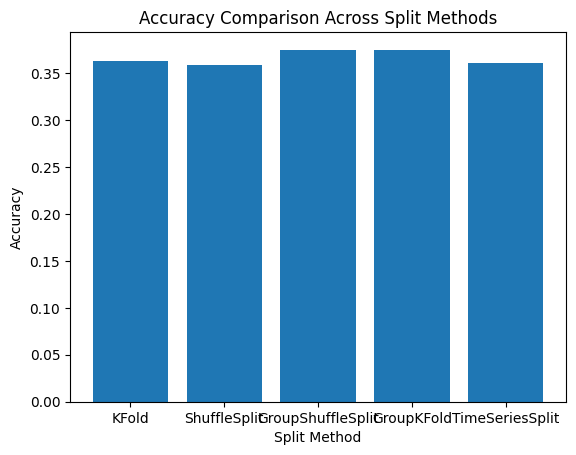

In [83]:

# Convert metrics dictionary to DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics).T


plt.bar(metrics_df.index, metrics_df['Accuracy'])
plt.xlabel('Split Method')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Across Split Methods')
plt.show()


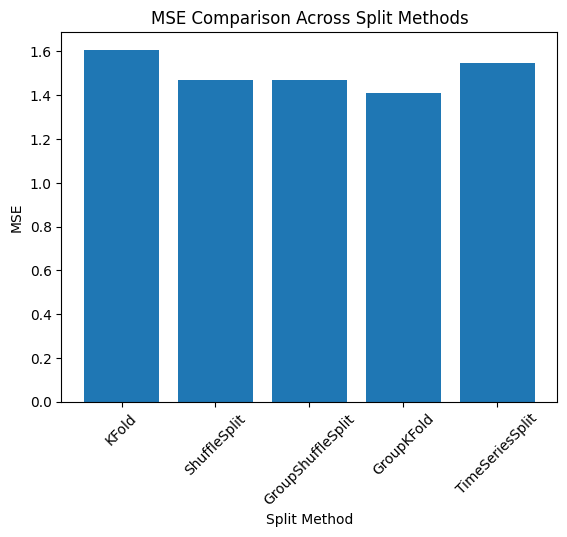

In [84]:
plt.bar(metrics_df.index, metrics_df['MSE'])
plt.xlabel('Split Method')
plt.ylabel('MSE')
plt.title('MSE Comparison Across Split Methods')
plt.xticks(rotation=45)
plt.show()


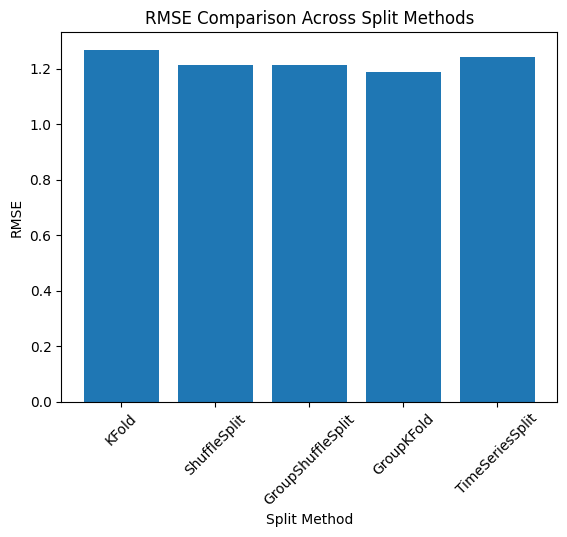

In [85]:
plt.bar(metrics_df.index, metrics_df['RMSE'])
plt.xlabel('Split Method')
plt.ylabel('RMSE')
plt.title('RMSE Comparison Across Split Methods')
plt.xticks(rotation=45)
plt.show()


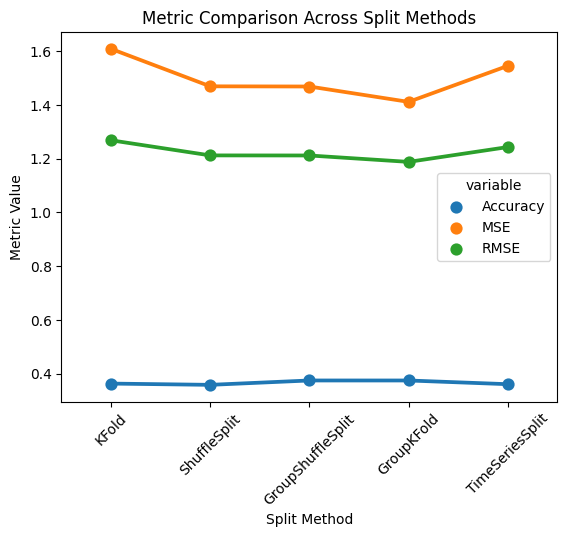

In [86]:
MeasuresArray = metrics_df.melt(value_vars=['Accuracy', 'MSE', 'RMSE'], ignore_index=False)

sns.pointplot(x=MeasuresArray.index, y="value", hue="variable", data=MeasuresArray)
plt.xlabel('Split Method')
plt.ylabel('Metric Value')
plt.title('Metric Comparison Across Split Methods')
plt.xticks(rotation=45)
plt.show()


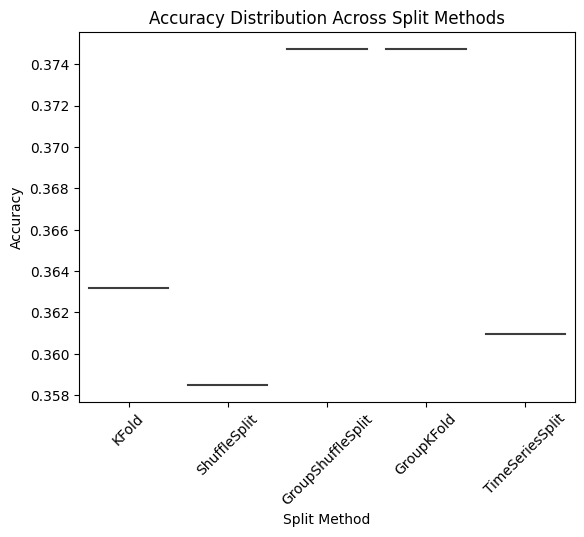

In [87]:
sns.violinplot(x=metrics_df.index, y="Accuracy", data=metrics_df)
plt.xlabel('Split Method')
plt.ylabel('Accuracy')
plt.title('Accuracy Distribution Across Split Methods')
plt.xticks(rotation=45)
plt.show()


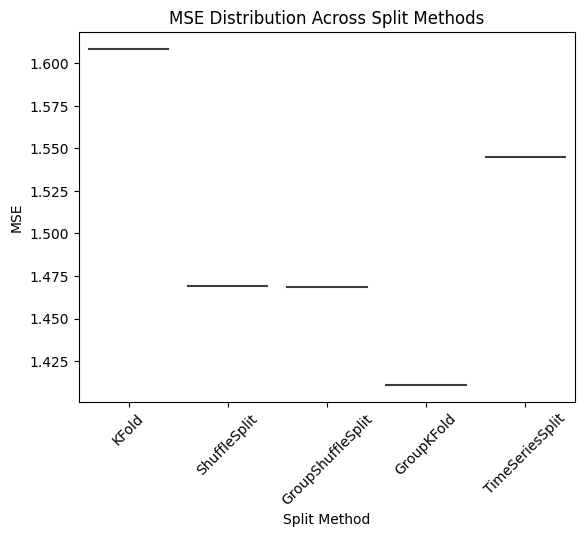

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.violinplot(x=metrics_df.index, y="MSE", data=metrics_df)
plt.xlabel('Split Method')
plt.ylabel('MSE')
plt.title('MSE Distribution Across Split Methods')
plt.xticks(rotation=45)  # This line will rotate the x-labels
plt.show()


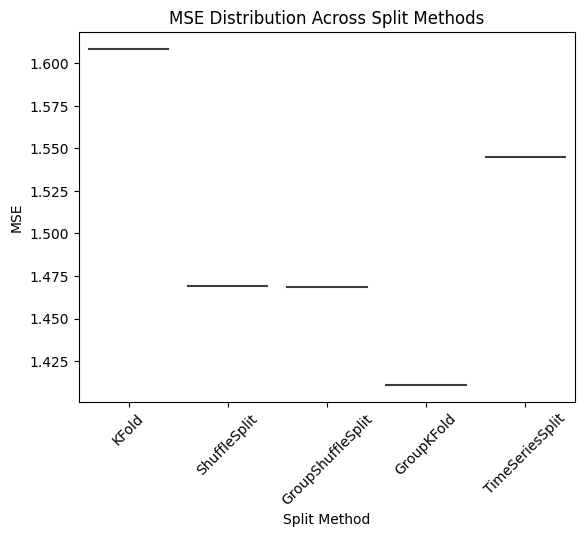

In [89]:
 
sns.violinplot(x=metrics_df.index, y="MSE", data=metrics_df)
plt.xlabel('Split Method')
plt.ylabel('MSE')
plt.title('MSE Distribution Across Split Methods')
plt.xticks(rotation=45) 
plt.show()

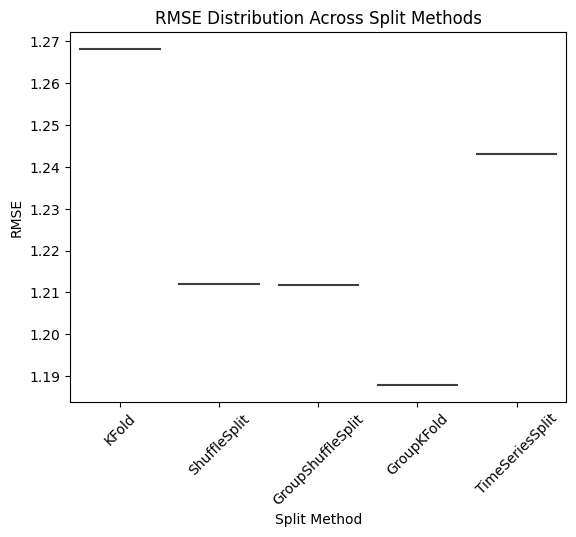

In [90]:
sns.violinplot(x=metrics_df.index, y="RMSE", data=metrics_df)
plt.xlabel('Split Method')
plt.ylabel('RMSE')
plt.title('RMSE Distribution Across Split Methods')
plt.xticks(rotation=45) 
plt.show()

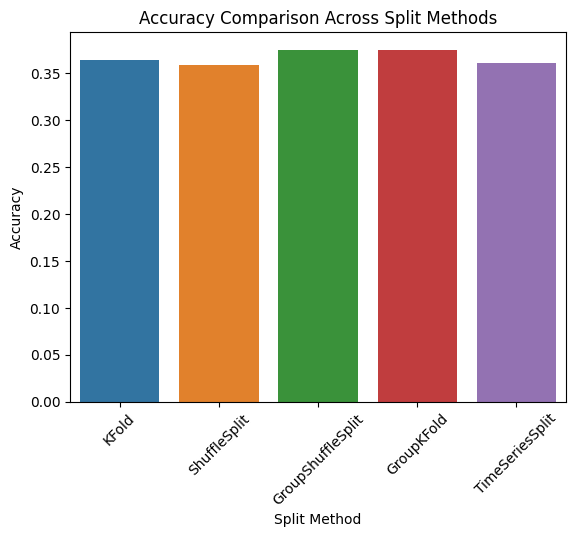

In [91]:
# Compare Accuracy across splits
sns.barplot(x=metrics_df.index, y="Accuracy", data=metrics_df)
plt.xlabel('Split Method')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Accuracy Comparison Across Split Methods')
plt.show()




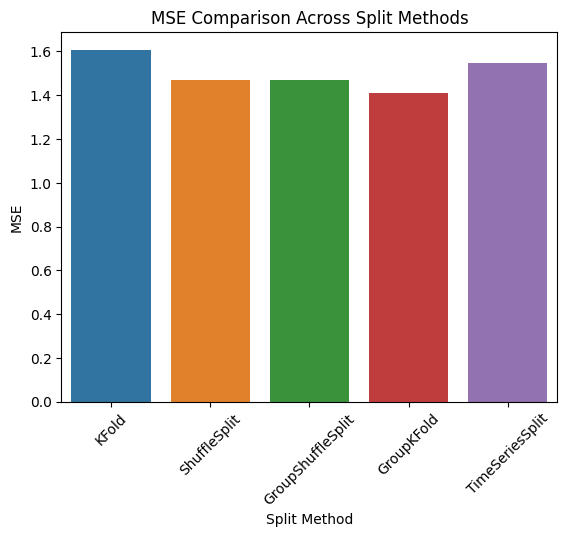

In [92]:
# Compare MSE across splits
sns.barplot(x=metrics_df.index, y="MSE", data=metrics_df)
plt.xlabel('Split Method')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.title('MSE Comparison Across Split Methods')
plt.show()



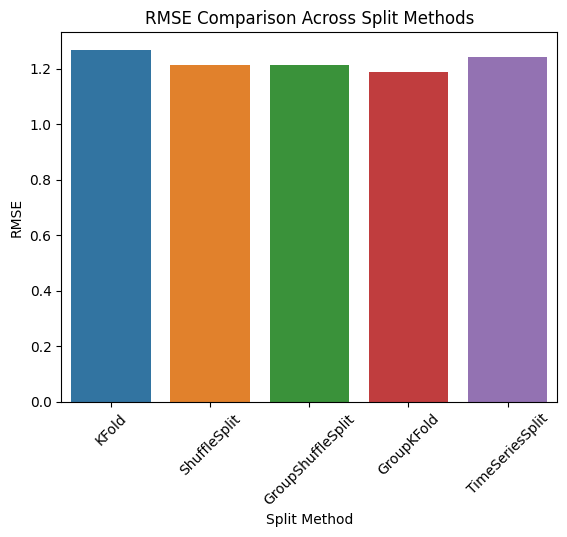

In [93]:
# Compare RMSE across splits
sns.barplot(x=metrics_df.index, y="RMSE", data=metrics_df)
plt.xlabel('Split Method')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.title('RMSE Comparison Across Split Methods')
plt.show()

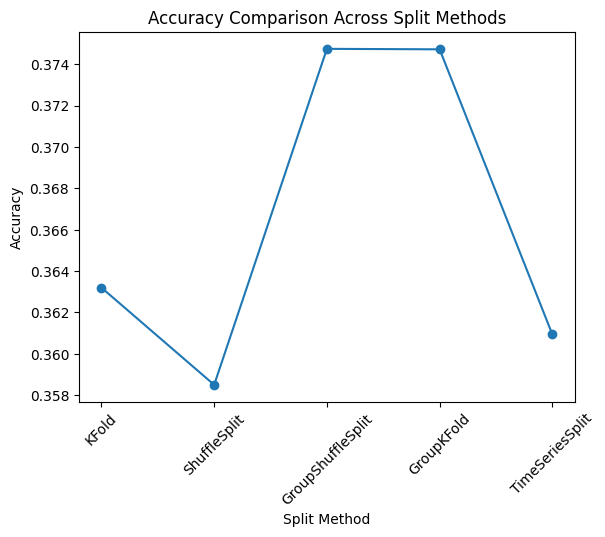

In [94]:
# Compare Accuracy across splits
plt.plot(metrics_df.index, metrics_df["Accuracy"], marker='o')
plt.xlabel('Split Method')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Accuracy Comparison Across Split Methods')
plt.show()


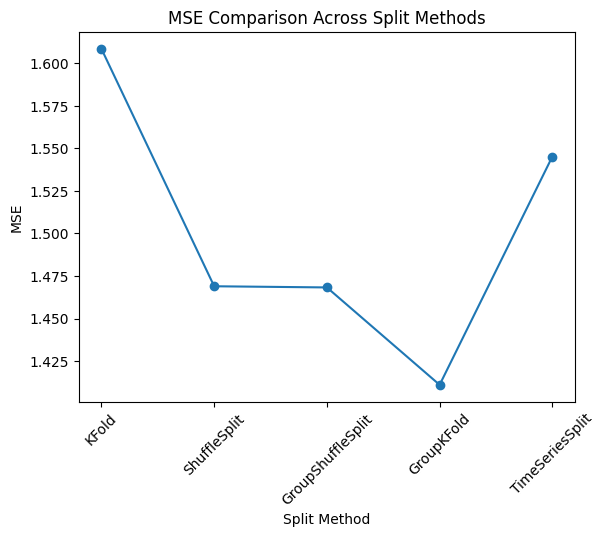

In [95]:
# Compare MSEs across splits
plt.plot(metrics_df.index, metrics_df["MSE"], marker='o')
plt.xlabel('Split Method')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.title('MSE Comparison Across Split Methods')
plt.show()


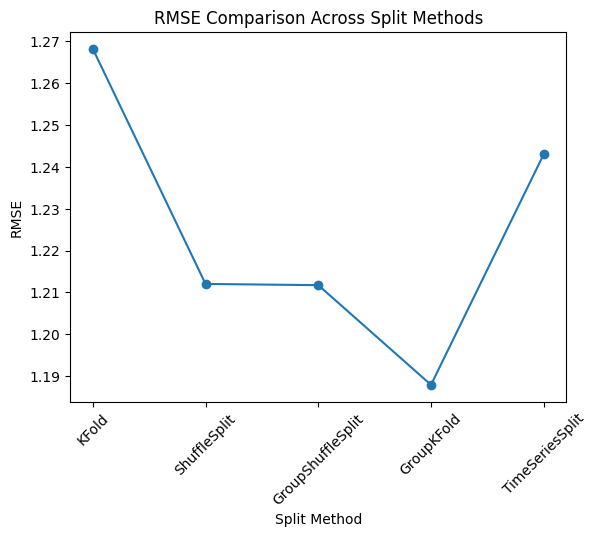

In [96]:

# Compare RMSEs across splits
plt.plot(metrics_df.index, metrics_df["RMSE"], marker='o')
plt.xlabel('Split Method')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.title('RMSE Comparison Across Split Methods')
plt.show()

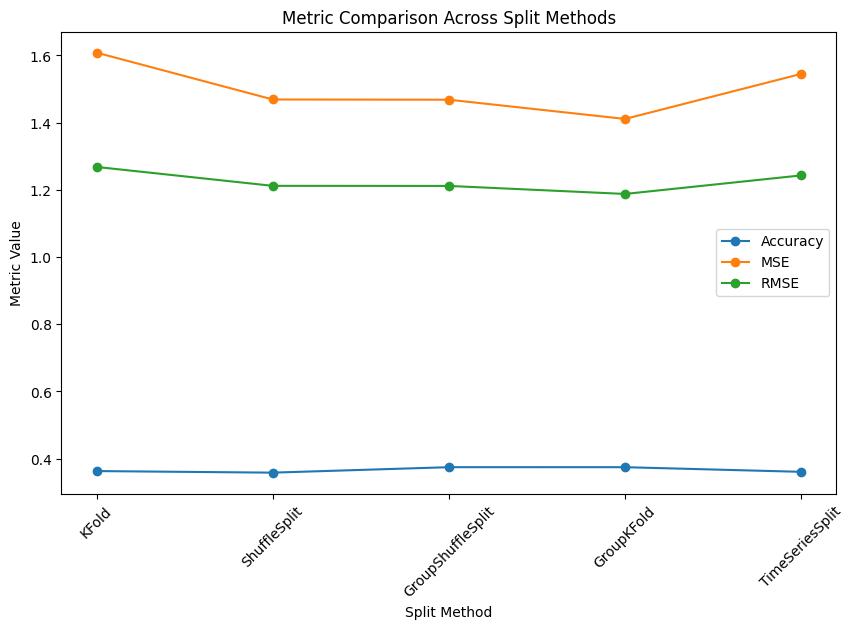

In [97]:
 plt.figure(figsize=(10,6))

# Add lines for each metric
plt.plot(metrics_df.index, metrics_df["Accuracy"], marker='o', label='Accuracy')
plt.plot(metrics_df.index, metrics_df["MSE"], marker='o', label='MSE')
plt.plot(metrics_df.index, metrics_df["RMSE"], marker='o', label='RMSE')

plt.xlabel('Split Method')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.title('Metric Comparison Across Split Methods')
plt.legend()  # Display legend

plt.show()
